<a href="https://colab.research.google.com/github/RoseBorges44/AirBnb/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="500%" src="https://user-images.githubusercontent.com/122793017/226485895-75f3dafd-af21-4479-924b-0e7b789c7b9a.png">


#### **Data Science na Prática 3.0**
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Condado de Broward, Flórida, Estados Unidos*

O [Airbnb](https://www.airbnb.com.br/) revolucionou a indústria hoteleira ao fornecer uma plataforma online para conectar viajantes com anfitriões que disponibilizam suas acomodações para aluguel. Embora a empresa não possua nenhum hotel, ela já é considerada a maior empresa hoteleira do mundo, com mais de 4 milhões de anfitriões em 191 países e 1 bilhão de hóspedes em sua plataforma.

Ao permitir que as pessoas aluguem quartos ou imóveis completos de maneira prática e personalizada, o Airbnb se tornou uma alternativa popular aos hotéis tradicionais, oferecendo aos viajantes uma experiência mais autêntica e, muitas vezes, mais econômica.

A empresa continua a crescer rapidamente, com um lucro líquido de quase 2 bilhões de dólares em 2022 e um crescimento anual de 20%.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving foto.png to foto.png


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

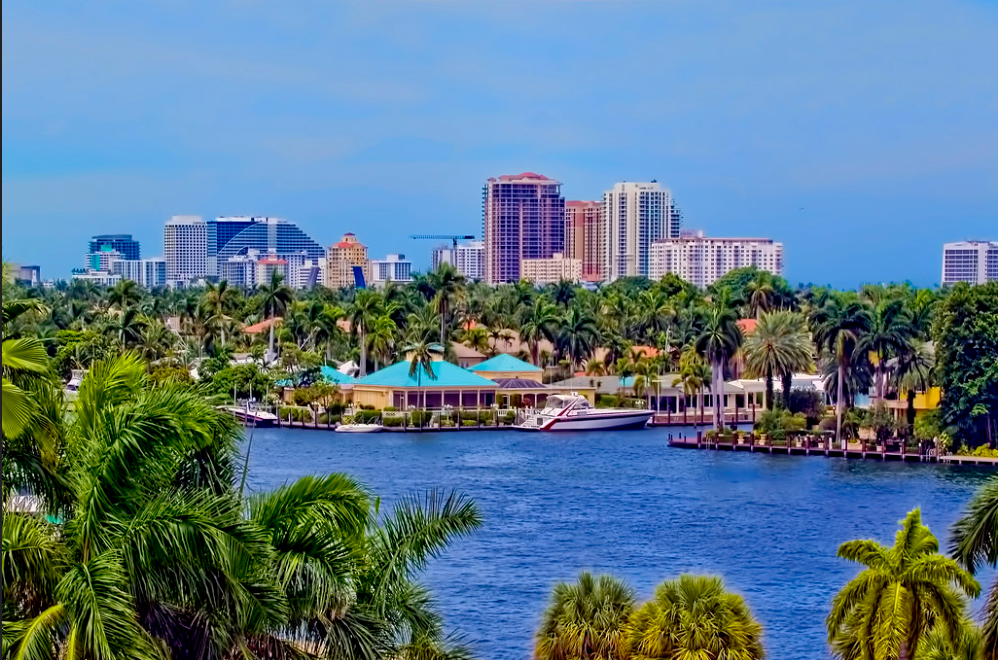

In [ ]:
imagem = cv2.imread('foto.png')
cv2_imshow(imagem)


## Objetivo Geral

**Realizar uma análise exploratória de dados brutos do Condado de Broward, Flórida, Estados Unidos, com o objetivo de identificar *insights* relevantes a partir das informações coletadas.**

### Objetivos Específicos

Durante alguns meses, tive o privilégio de morar nesta região. Agora, para matar a saudade e relembrar os bons momentos, decidi realizar uma análise exploratória dos dados brutos do Condado de Broward. Utilizando técnicas estatísticas e gráficas, pretendo identificar insights relevantes e significativos que possam ser utilizados na tomada de decisões ou para aprimorar a compreensão do contexto do condado.

## Objeto de Estudo
O **Condado de Broward é um dos 67 condados do estado da Flórida**, nos Estados Unidos. Sua sede está localizada na cidade de Fort Lauderdale e o condado possui uma população de aproximadamente 2 milhões de habitantes, de acordo com dados de 2020.

O Condado de Broward é um importante centro turístico e econômico da Flórida, com diversas praias, parques, restaurantes, lojas e atrações turísticas. Além disso, o Aeroporto Internacional de Fort Lauderdale-Hollywood é um importante hub de transporte para o sul da Flórida e o Caribe.

O condado possui diversas instituições de ensino superior, incluindo a Florida Atlantic University, a Nova Southeastern University e a Broward College, além de várias escolas públicas e privadas.

O turismo e a indústria de serviços são importantes setores econômicos do Condado de Broward, que também possui uma forte presença nas áreas de tecnologia, saúde e ciências da vida. O Port Everglades, localizado em Fort Lauderdale, é um importante porto de entrada para cargas e passageiros.

O Condado de Broward também é conhecido por sua rica diversidade cultural, com uma grande comunidade de imigrantes de diversas partes do mundo, incluindo América Latina, Caribe, Ásia e Europa.

Possui 2 das cidades mais ricas do Sul da Flórida: Parkland e Cooper City.

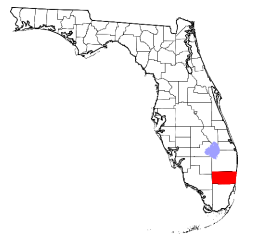

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Broward County (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/united-states/fl/broward-county/2022-12-28/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://www.dropbox.com/s/mki9lgsc26rl9ps/reviews.csv?dl=0) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [ ]:
# # importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/fl/broward-county/2022-12-28/visualisations/listings.csv')


## Análise dos Dados
No início, foram coletadas *informações relevantes* para compreender o conjunto de dados. As informações consideradas importantes foram resumidas neste capítulo.

**Dicionário das variáveis**

* `availability_365` - número de dias de disponibilidade do imóvel, dentro de 365 dias
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `host_name` - Nome do anfitrião (geralmente o primeiro nome)
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `id` - número de id gerado para identificar o imóvel
* `last_review` - data da última avaliação
* `latitude` - coordenada da latitude da propriedade
* `license`- número de registro, licença ou permissão 
* `longitude` - coordenada da longitude da propriedade
* `minimum_nights` - quantidade mínima de noites para reservar
* `name` - nome da propriedade
* `neighbourhood` - bairro; de forma mais específica que o posterior; trata-se de uma região menor
* `neighbourhood_group` - bairro (entre os 5 que New York possui); é mais amplo do que a variável anterior
* `number_of_reviews_ltm` - número de *reviews* que a propriedade obteve nos últimos 12 meses
* `price` - preço para alugar o imóvel (em moeda local)
* `reviews_per_month` - quantidade de *reviews* por mês
* `room_type` - informa o tipo de aluguel que é oferecido (casa ou apartamento inteiro, quarto privado, quarto compartilhado, quarto de hotel)

Informações obtidas no site [Inside Airbnb Data Dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596)



Antes de iniciar qualquer análise, vamos examinar as primeiras cinco entradas do conjunto de dados para entender sua estrutura.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

id                                 name  host_id  \
0   83449        MARY POP APTS 2/1 APT SLEEP 5   454736   
1   69824            2 bd/2ba Oceanfront Condo   351303   
2  191160   Tropical Beach Paradise Awaits You   924482   
3  129099  MIAMI - AMAZING APARTMENT OCEANVIEW   637272   
4  129061  MIAMI - LUXURY APARTMENT OVER BEACH   637272   

                   host_name  neighbourhood_group     neighbourhood  latitude  \
0  Jon,  Mary Pop Apartments                  NaN       Dania Beach  26.03392   
1                      Tracy                  NaN  Hallandale Beach  25.97641   
2                        Dan                  NaN   Deerfield Beach  26.30707   
3                     Bianca                  NaN         Hollywood  25.99416   
4                     Bianca                  NaN         Hollywood  25.99332   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -80.14201  Entire home/apt     99               7                 23   
1  -80.12052  Entire home/apt    150              30                  3   
2  -80.07793  Entire home/apt    119               2                 25   
3  -80.11969  Entire home/apt    225              28                 27   
4  -80.11887  Entire home/apt    261              28                 21   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2022-12-08               0.17                               8   
1  2022-08-15               0.05                               2   
2  2019-11-08               0.19                               1   
3  2022-07-01               0.20                               6   
4  2022-03-27               0.15                               6   

   availability_365  number_of_reviews_ltm  license  
0                 0                      3      NaN  
1               276                      1      NaN  
2                87                      0      NaN  
3               338                      2      NaN  
4               336                      2      NaN

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos agora identificar o número de entradas presentes em nosso conjunto de dados e visualizar os tipos de dados de cada coluna.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 16478
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

Podemos observar no resultado acima que temos **16478 linhas e 18 colunas**. Portanto temos 16.478 anúncios e atributos dos tipos: inteiro, float e objeto.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente ligada à quantidade de valores ausentes presentes nele. É essencial avaliar, desde o início, se esses valores nulos são significativos em relação ao total de entradas.

In [ ]:
# verificar os valores ausentes, ordená-los em ordem decrescente e expressos em %
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)



license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.205243
last_review                       0.205243
host_name                         0.000061
name                              0.000061
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Podemos observar que:
* a coluna `license` e  `neighbourhood_group` possuem 100% dos seus dados ausentes.
* nas colunas `reviews_per_mont` e `last_review` possuem cerca de 20% dos dados ausentes.
* já nas nas colunas `name` e `host_name` existe uma quantidade muito pequena de dados ausentes, menos de 0.1%. O que não exigirá nenhum tratamento.


### **Q3. Qual o tipo de distribuição das variáveis?** 

Com o objetivo de tornar a distribuição das variáveis numéricas mais fácil de entender, foi criada uma visualização em forma de histogramas.

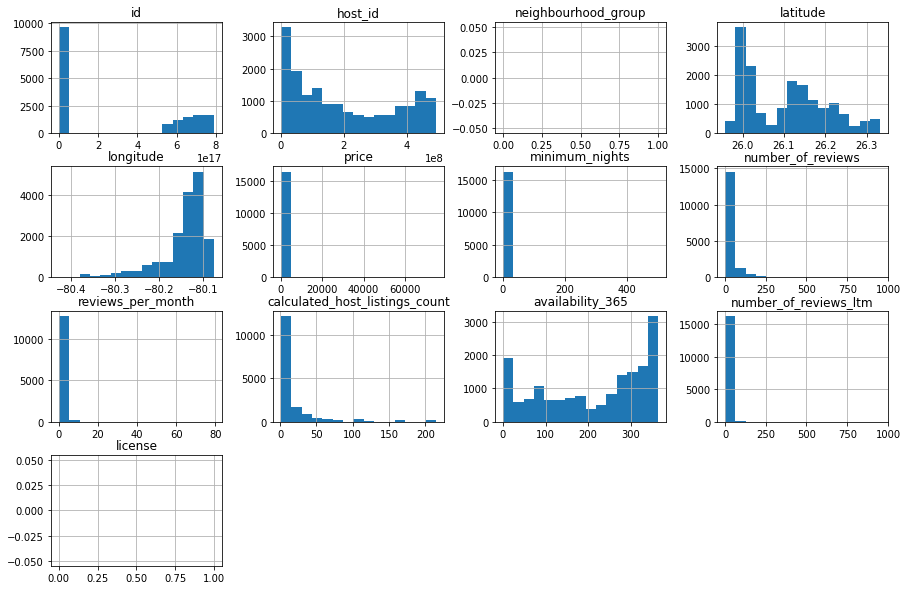

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));
plt.show()


### **Q4. Há *outliers* presentes?**

Analisando a distribuição dos histogramas, é possível identificar sinais de presença de valores discrepantes (*outliers*). Um exemplo disso são as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'host_id', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

price       host_id  minimum_nights  number_of_reviews  \
count  16478.000000  1.647800e+04    16478.000000       16478.000000   
mean     392.038233  1.956108e+08        5.254157          26.483493   
std     1136.088084  1.621601e+08       17.333348          50.970229   
min        0.000000  5.146000e+03        1.000000           0.000000   
25%      130.000000  4.695476e+07        1.000000           1.000000   
50%      214.500000  1.492306e+08        2.000000           8.000000   
75%      396.000000  3.580359e+08        3.000000          30.000000   
max    75150.000000  4.928213e+08      500.000000         953.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count       13096.000000                    16478.000000      16478.000000  
mean            1.560303                       17.458065        212.649351  
std             1.788142                       34.912478        125.161708  
min             0.010000                        1.000000          0.000000  
25%             0.470000                        1.000000         92.000000  
50%             1.110000                        4.000000        255.000000  
75%             2.220000                       16.000000        328.000000  
max            79.420000                      215.000000        365.000000

Ao analisar o resumo estatístico acima, é possível confirmar algumas hipóteses, tais como:

* Observamos na variável `price` que a mesma possui uma média de 215,5 dólares a diária e 75% dos valores estão abaixo de 396 dólares, porém seu valor máximo sendo 75.150 dólares a diária prejudica a análise dos dados, por isso será necessário um tatamento para a retirada destes *outliers*.

* Acontece algo parecido com a variável mínimo de noites (`minimum_nights`) a qual está acima de 365 dias no ano, não faria sentido o proprietário exigir que alguém alugue seu imóvel por no mínimo 500 noites, o que daria quase 1 ano e 5 meses já qua a média é de 2 noites.


#### Boxplot da variável *Valor da diária* (`price`)
Foi procurado um valor que permitisse remover os valores atípicos do conjunto de dados sem causar muitos danos. Para isso, foi estabelecido um limite de 1% do total de entradas que poderiam ser removidas.

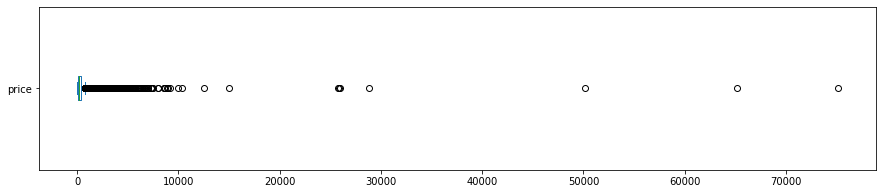


<price>
Valores acima de 3,400 dólares/diária
156 entradas
0.95%


In [ ]:
# gerar boxplot price
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# visualizar a quantidade de valores acima de 3400 dólares
print('\n<price>\nValores acima de 3,400 dólares/diária')
print('{} entradas'.format(len(df[df.price > 3400])))
print('{:.2f}%'.format((len(df[df.price > 3400]) / df.shape[0]) * 100))

A partir da análise realizada, determinou-se que o valor de limiar para a limpeza dos dados é de **3.400 dólares**.

*O valor de corte precisou ser alto pois o Condado de Broward, localizado no estado da Flórida nos Estados Unidos, possui imóveis caros por vários motivos. Um deles é sua localização privilegiada na região sul da Flórida, com fácil acesso a praias, atrações turísticas e centros urbanos importantes, o que torna a região um lugar atrativo para moradia e investimentos imobiliários. Além disso, o clima agradável durante todo o ano e a presença de importantes instituições acadêmicas e empresariais na região também contribuem para a valorização dos imóveis no Condado de Broward. Outro fator que pode influenciar os preços é a disponibilidade de terrenos para construção e a demanda por imóveis em uma região com alta densidade populacional.
Apenas 8% das famílias podem pagar por uma moradia unifamiliar no condado.*

**Boxplot da variável *Mínimo de Noites*** (`minimum_nights`)

Faremos o mesmo estudo que foi realizado com a varável preço.

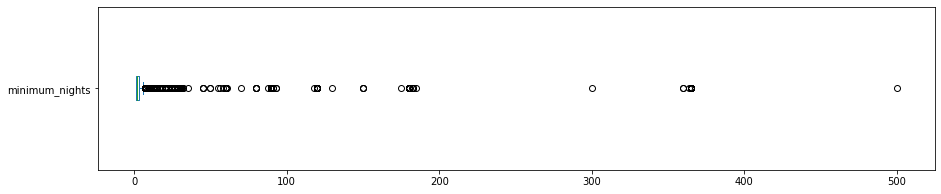

minimum_nights: valores acima de 80:
164 entradas
0.9953%


In [ ]:
# gerar boxplot minimun_nights
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 80 dias para minimum_nights
print("minimum_nights: valores acima de 80:")
print("{} entradas".format(len(df[df.minimum_nights > 80])))
print("{:.4f}%".format((len(df[df.minimum_nights > 80]) / df.shape[0])*100))

A partir da análise realizada, determinou-se que o valor de corte encontrado para a limpeza dos dados é de **80 noites.**

#### **Histogramas sem *outliers***

Com base nas informações mencionadas e já que identificamos *outliers* nas variáveis `price` e `minimum_nights` do conjunto de dados, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

Removemos também a variável `license` e `neighbourhood_group`, pois não contém valores válidos nela.



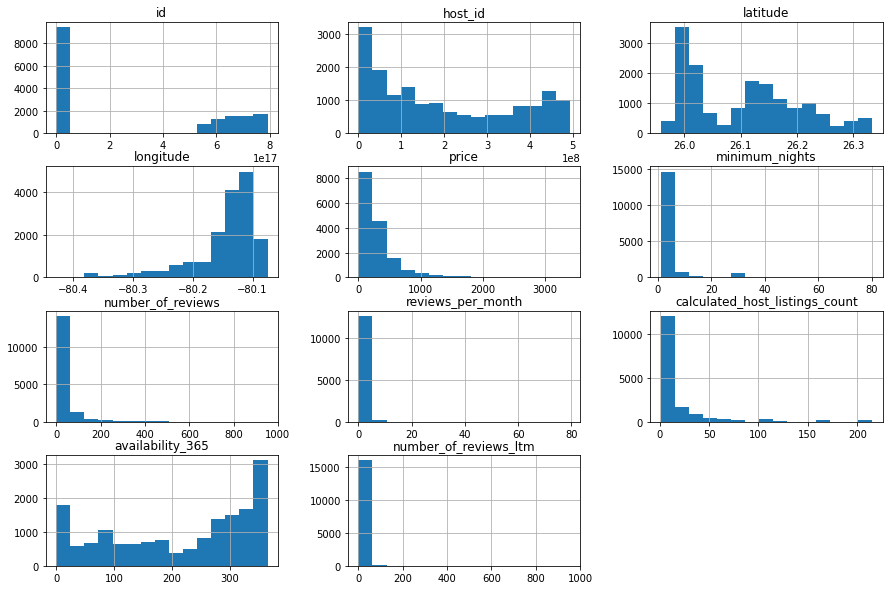

In [ ]:
# remover os *outliers* em um novo DataFrame
# copiar o dataframe
df_clean = df.copy()

# remover os anúncios com preço acima de 3,400 dólares
df_clean.drop(df_clean[df_clean.price > 3400].index, axis=0, inplace=True)

# remover os anúncios com estadia mínima de noites acima de 80 
df_clean.drop(df_clean[df_clean.minimum_nights > 80].index, axis=0, inplace=True)

# remover variável 'license'
df_clean.drop('license', axis=1, inplace=True)

# remover variável 'neighbourhood_group'
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar histogramas
df_clean.hist(bins=15, figsize=(15,10));
plt.show()


Vamos analizar como ficou após o *Tratamento dos Dados*

In [ ]:
# gerar resumos estatísticos
df_clean[['price', 'minimum_nights']].describe()

price  minimum_nights
count  16159.000000    16159.000000
mean     331.364503        3.905935
std      372.428744        6.460852
min        0.000000        1.000000
25%      130.000000        1.000000
50%      214.000000        2.000000
75%      390.000000        3.000000
max     3394.000000       80.000000

Em relação aos preços, observa-se uma média de 331 dólares e uma mediana de 214 dólares, indicando que os valores estão próximos. 

No que diz respeito ao número mínimo de noites, identificamos que existe um pico de valores. Por isso, para entender melhor essas variações, será gerado um novo histograma com um limite máximo de 40 dias, sem alterar o conjunto de dados original (`df_clean`).

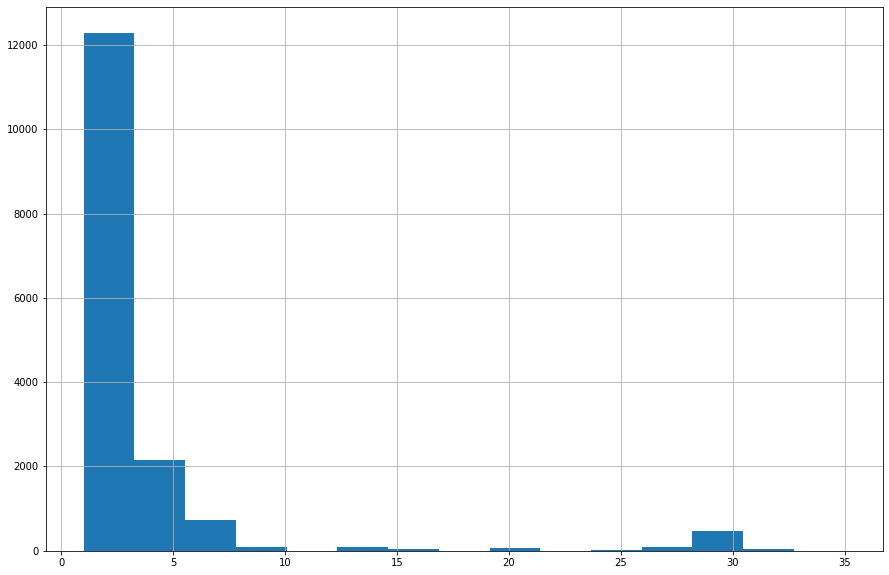

In [ ]:
# gerar novo histograma para 'minimum_nights' com valor máximo de 40 noites
minimum_nights_40 = df_clean.drop(df_clean[df_clean.minimum_nights > 40].index, axis=0)
minimum_nights_40.minimum_nights.hist(bins=15, figsize=(15,10));
plt.show()

In [ ]:
# contagem dos dados da variável 'minimum_nights_40' (até 40 dias)
# mostrar apenas os 10 primeiros valores (com maiores contagens)
minimum_nights_40.minimum_nights.value_counts()[:10]

1     5195
2     3964
3     3122
4     1092
5     1069
7      597
30     459
6      139
14      94
28      87
Name: minimum_nights, dtype: int64

In [ ]:
# mostrar os valores acima em porcentagens
(minimum_nights_40.minimum_nights.value_counts()[:10] / minimum_nights_40.shape[0]) * 100

1     32.239047
2     24.599727
3     19.374457
4      6.776716
5      6.633983
7      3.704853
30     2.848455
6      0.862604
14     0.583344
28     0.539903
Name: minimum_nights, dtype: float64

Podemos afirmar que os dados concentram-se entre 1 e 3 noites, e em menor prporção entre 4 e 7 e depois em 30 noites. 
Resumo: em **76% dos anúncios exigem uma estadia mínima entre 1 a 3 diárias**, e somente 2,8% dos anuncios exigem as estadias de no mínimo 30 noites.

*Percebemos isso devido a ser uma região predominantemente turísticas, não tendo foco em aluguéis residenciais.*

### **Q5. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
print('Média dos preços de aluguel: US$ {:.2f}'. format(df_clean.price.mean()))


Média dos preços de aluguel: US$ 331.36


### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 
                 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365', 
                 'number_of_reviews_ltm']].corr()


# mostrar a matriz de correlação
display(corr)

price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.053689          -0.101422   
minimum_nights                 -0.053689        1.000000          -0.107508   
number_of_reviews              -0.101422       -0.107508           1.000000   
reviews_per_month              -0.064241       -0.178742           0.587457   
calculated_host_listings_count  0.101526       -0.054886          -0.063024   
availability_365                0.051480       -0.008656          -0.024612   
number_of_reviews_ltm          -0.084126       -0.135859           0.696673   

                                reviews_per_month  \
price                                   -0.064241   
minimum_nights                          -0.178742   
number_of_reviews                        0.587457   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.071822   
availability_365                         0.025246   
number_of_reviews_ltm                    0.886369   

                                calculated_host_listings_count  \
price                                                 0.101526   
minimum_nights                                       -0.054886   
number_of_reviews                                    -0.063024   
reviews_per_month                                    -0.071822   
calculated_host_listings_count                        1.000000   
availability_365                                      0.124634   
number_of_reviews_ltm                                -0.049156   

                                availability_365  number_of_reviews_ltm  
price                                   0.051480              -0.084126  
minimum_nights                         -0.008656              -0.135859  
number_of_reviews                      -0.024612               0.696673  
reviews_per_month                       0.025246               0.886369  
calculated_host_listings_count          0.124634              -0.049156  
availability_365                        1.000000               0.012813  
number_of_reviews_ltm                   0.012813               1.000000

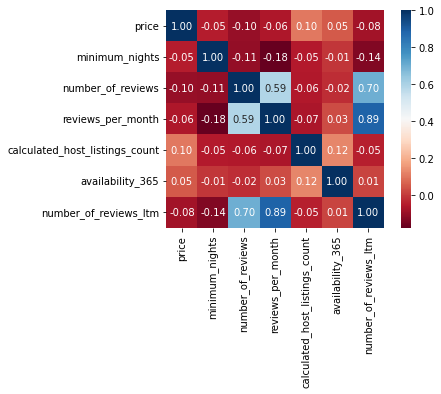

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Quanto mais próximo de 1 ou -1 for o coeficiente de correlação entre as variáveis, mais forte será a relação entre elas. Por outro lado, valores próximos de 0 indicam ausência de correlação. No presente caso, a única correlação forte, com um coeficiente de 0,89, é observada entre as variáveis `reviews_per_month` e `number_of_reviews_ltm`. Isso é coerente porque ambas medem a quantidade de avaliações que um imóvel recebeu, mas com diferentes períodos de tempo: uma mede a quantidade de avaliações por mês e a outra mede a quantidade de avaliações nos últimos 12 meses.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

Plataformas como o Airbnb trouxeram a possibilidade de diferentes formas de locação:
*   apartamento/casa inteira
*   um quarto/espaço inteiro
*   um quarto/espaço compartilhado
*   um quarto de hotel

Hoje por um preço muito atrativo uma família, casal ou grandes grupo de amigos conseguem alugar um espaço completo para passar uma temporada por um preço bem mais atrativo dos usados pela rede hoteleira.

Vamos verificar quais são mais comum no *Condado de Broward.*

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13522
Private room        2455
Shared room          128
Hotel room            54
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.836809
Private room       0.151928
Shared room        0.007921
Hotel room         0.003342
Name: room_type, dtype: float64

Foi observado que a grande maioria dos imóveis disponíveis, **cerca de 83%, são apartamentos/casas completas**. 

### **Q8. Qual a localidade mais cara e mais barata do Condado de Broward?**
O objetivo da análise foi identificar os bairros mais caros e mais baratos para alugar imóveis no Condado de Broward, a fim de fornecer informações sobre os bairros mais populares e mais econômicos da cidade.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Tribal Land                 792.666667
Lighthouse Point            677.308511
Lazy Lake                   663.666667
Hillsboro Beach             647.844828
County Regional Facility    600.666667
Southwest Ranches           528.916667
Plantation                  434.426316
Lauderdale By The Sea       389.602817
Hollywood                   371.536637
Davie                       368.934524
Name: price, dtype: float64

Podemos observar e identificar como os locais mais **econômicos Davie, seguido por Hollywood**. E, os locais mais **caros: Tribal Land  e Lighthouse Point.**

In [ ]:
# ver quantidade de imóveis em Davie - local mais barato
print(df_clean[df_clean.neighbourhood == "Davie"].shape)



(168, 16)


Temos **168** imóveis nesta região.

In [ ]:
# ver quantidade de imóveis em Lauderdale By The Sea, Hollywood e Davie que são os locais mais baratos
print(df_clean[df_clean.neighbourhood == "Lauderdale By The Sea"].shape)
print(df_clean[df_clean.neighbourhood == "Hollywood"].shape)
print(df_clean[df_clean.neighbourhood == "Davie"].shape)

(355, 16)
(4217, 16)
(168, 16)


* Lauderdale By The Sea - 355
* Hollywood - 4217
* Davie - 168

Temos **4.740** imóveis nesta região - mais barata.

In [ ]:
# ver quantidade de imóveis em Tribal Land - local mais caro
print(df_clean[df_clean.neighbourhood == "Tribal Land"].shape)

(3, 16)


Temos **3** imóveis nesta região.

In [ ]:
# ver quantidade de imóveis em Tribal Land, Lighthouse Point e Lazy Lake que são os locais mais caros
print(df_clean[df_clean.neighbourhood == "Tribal Land"].shape)
print(df_clean[df_clean.neighbourhood == "Lighthouse Point"].shape)
print(df_clean[df_clean.neighbourhood == "Lazy Lake"].shape)

(3, 16)
(94, 16)
(6, 16)


* Tribal Land - 3
* Lighthouse Point - 94
* Lazy Lake - 6

Temos **103** imóveis nesta região, mais cara.

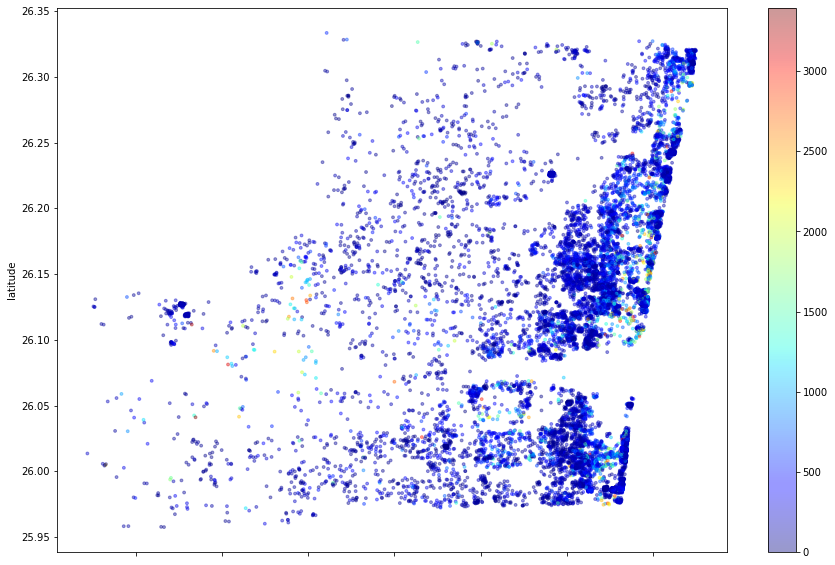

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
              c=df_clean.price, s=8, cmap=plt.get_cmap('jet'), figsize=(15,10));


Atraves deste estudo podemos perceber que os imóveis disponíveis ficam  proximos da costa, pois, a Flórida é conhecida por seu clima quente e ensolarado durante a maior parte do ano. Isso faz com que a costa da Flórida seja um destino popular para pessoas que desejam desfrutar do sol e das praias.

As praias são lindas, há muitas opções de entretenimento e a área é conhecida por sua excelente gastronomia. Além disso, a costa da Flórida oferece muitas opções de esportes aquáticos e outras atividades ao ar livre.

A região experimentou um crescimento significativo nos últimos anos, e muitos investidores estão comprando propriedades na área como uma forma de gerar renda e aumentar seu patrimônio.

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Airbnb-Management-Fort-Lauderdale.jpeg.crdownload to Airbnb-Management-Fort-Lauderdale.jpeg.crdownload


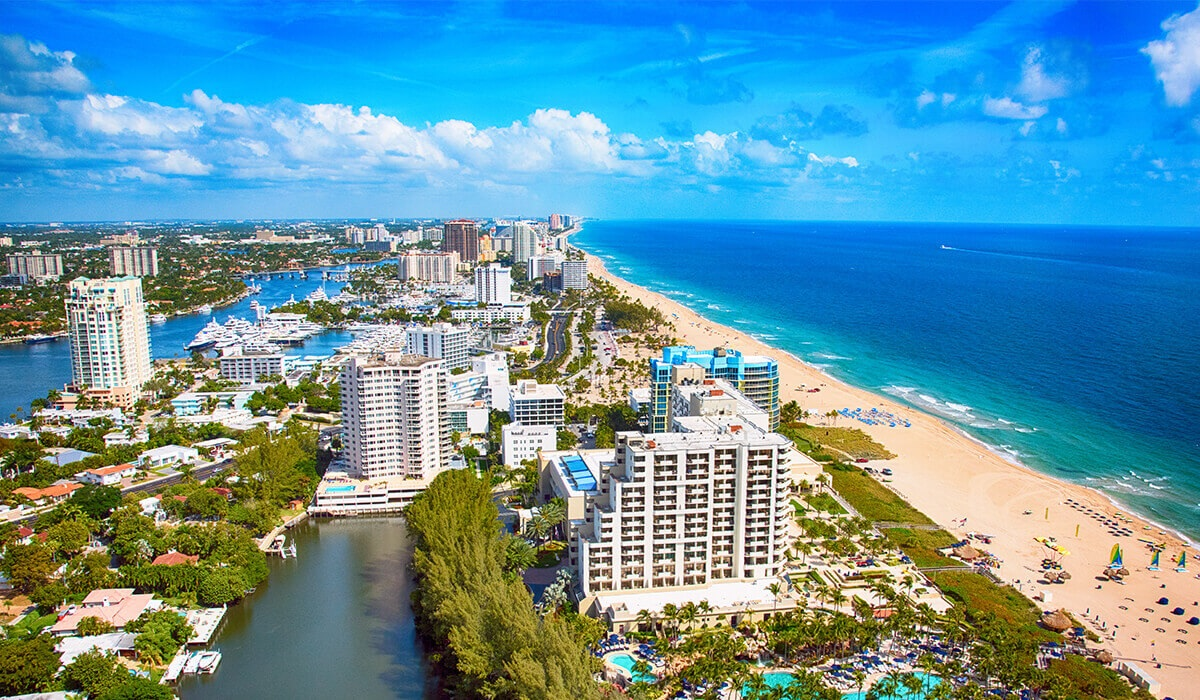

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

imagem = cv2.imread('/content/Fort.jpeg.crdownload')
cv2_imshow(imagem)



### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.describe()

count    16159.000000
mean         3.905935
std          6.460852
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         80.000000
Name: minimum_nights, dtype: float64

Podemos observar que a **média de noites mínimas** que os anfitriões exigem para reservar suas propriedades é de **4 dias**. Sendo que, a mediana é de 2 dias e só em 75% do conjunto de dados há uma exigência mínima de reserva de 3 noites.

## Conclusões


A partir desta análise exploratória dos dados dos anúncios de imóveis na plataforma Airbnb no Condado de Broward, podemos concluir:

### **Sobre a distribuição de tipos de anúncios**
* 83,68 % são anúncios de casas/apartamentos inteiros;
* 15,19 % são ofertas de quartos privados;

*Esses dois tipos de aluguel representam juntos um total de 98,87% dos anúncios na plataforma.*

* Somente 1,13 % dos anúncios são de dependências compartilhadas.

### **Sobre o preço**
*   Média de 331,16 dólares por noite;
*   Sendo que **75% do total do conjunto de dados cobra até 390 usd a diária**.

### **Sobre a estadia mínima**
* Podemos afirmar que os dados concentram-se entre 1 e 3 noites, e em menor proporção entre 4 e 7 e depois em 30 dias.

Resumo: em **76% dos anúncios exigem uma estadia mínima entre 1 a 3 diárias**, e somente 2,8% dos anuncios exigem as estadias de no mínimo 30 noites.



### **Conclusões finais e recomendações**
Concluindo, não foi observada nenhuma variável relevante com alta correlação no conjunto de dados analisado. No entanto, é importante destacar que este conjunto de dados é uma versão resumida e os dados completos estão disponíveis no site. Portanto, para uma análise mais detalhada, é recomendável usar o conjunto de dados completo, que contém mais registros e atributos.